Task-5A: Please go over the example with Random Forest Algorithm on the digits dataset. Please run it with grid search by which you should try at least 3 values for 5 of the parameters. Then show the best parameters and explain the best model over the others. Please also provide a basic explanation for the Random Forest algorithm.

Random Forest algoritmasının temelde yaptığı birden çok karar ağacının ürettiği tahminleri bir araya getirerek değerlendirmesidir. Bagging metodolojisi kullanılıyor. Paralelde birden fazla ağacın ürettiği tahmin değerleri alınıp ortalaması alınır. Ağaçlar için gözlemler rastgele seçilmektedir. Bagging den farkı, her bir ağaçtan tahmin değerleri talep edilirken hata oranları göz önüne alınarak ağaçlara ağırlık verilir.

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.30, random_state=42)

In [44]:
X_train.shape

(1257, 64)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier() 
#n_estimators (ağaç sayısı), max_features

In [46]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
              'max_depth': [2, 3, 5, 8, 10], 
              'max_features': [20, 30, 40],
              'n_estimators': [10, 50, 100, 500],
              'min_samples_split': [3, 5, 7, 10]
             }

In [50]:
rf_grid = GridSearchCV(rf_model, 
                       param_grid, 
                       cv=5, 
                       refit=True,
                       n_jobs=-1,
                       verbose=2)

In [51]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [32]:
print("Best paramters: " +str(rf_grid.best_params_))

Best paramters: {'max_depth': 10, 'max_features': 20, 'min_samples_split': 7, 'n_estimators': 50}


In [34]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 20, 
                                  min_samples_split = 7, 
                                  n_estimators = 50 )
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_pred = rf_tuned.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("{} {:0.2f}%".format("Accuracy Score : ", score*100))

Accuracy Score :  96.85%


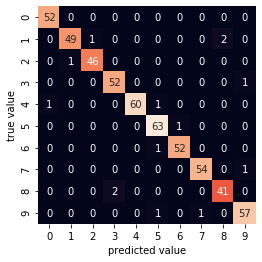

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Model kurulmadan önce en iyi parametreleri tespit edebilmek için GridSearchCV fonksiyonunu kullanarak parametreler bulundu. Dört farklı parametre ve CV değerini 5 olarak tanımlatıp modeli fit ettim. Toplamda 240 farklı parametre kominasyonu ile 5 farklı train ve tast işlemlerini gerçekleştirdi.(240*5=1200). 
Best paramters: {'max_depth': 10, 'max_features': 20, 'min_samples_split': 7, 'n_estimators': 50}
En iyi parametreler tespit edildikten sonra bu değerler modele verilip fit edildi.  Sonrasında moedele test değerlerini de verip predict değerler bulundu. Y_test değerleri ile tahmin edilen değerler karşılaştırıldığında modelin accuracy oranı yüzde 96.85 olarak bulunmuştur.

Task-5B: Please explain how the principal component analysis (PCA) works in principle and what are the most common and relevant uses of PCA in practice? Please provide concrete examples for each of these uses. 

PCA , sınıflandırma, boyut indirgeme, verileri korelasyondan ayırma, yüksek boyutlu verilerin görselleştirilmesi ve gürültü filtreleme gibi alanlarda kullanılan yararlı bir istatistiksel tekniktir.

Temel amacı birbirleri ile ilişkili olan çok sayıda değişkenden meydana gelen bir çok değişkenli sistemi, bu değişkenlerin doğrusal fonksiyonları şeklinde daha az sayıda ve birbirleri ile ilişkisiz ve aynı zamanda önceki sisteme ait toplam değişimi mümkün olduğunca büyük oranda açıklayabilen yeni değişkenlerden meydana gelen sisteme dönüştüren çok değişkenli istatistiksel analiz tekniğidir.

Fazla boyutlu verilerdeki genel özellikleri bularak boyut sayısının azaltılmasını, verinin sıkıştırılmasını sağlar. Bu nedenle bazı özellikler kaybolur fakat amaçlanan, bu kaybolan özelliklerin popülasyon hakkında çok az bilgi içeriyor olmasıdır.

Özetle, PCA şu şekildedir: Yüksek boyutlu verilerde maksimum varyansı bulmak ve bilgiyi korurken daha küçük boyutlara indirgemektir.

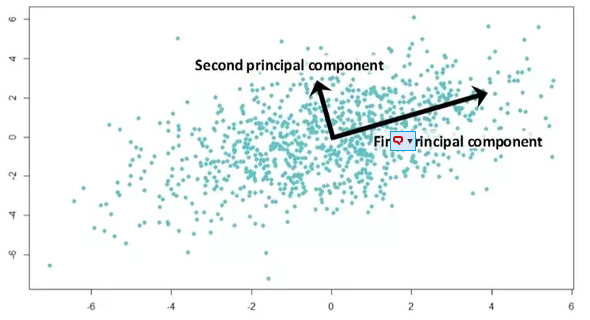

component axes that maximize the variance

PCA’ın kullanıldığı alanlar sırasıyla;

- Gürültü Filtreleme

Verisetinde Anomaly,Outlier olan verileri PCA ile ortaya çıkarılması.

- Görselleştirme

Boyut indirgendikten sonra rahatça görselleştirme yapılabilir

- Öznitelik Çıkarımı

Veriler üzerinden yeni öznitelik çıkarımı yapılabilir.

- Öznitelik Eleme,Dönüştürme

Fazla olan özelliklerin çıkarılması.

PCA ALGORİTMASI

- İndirgenmek istenen boyutun karar verilmesi-Örnek k boyutu olsun
- Verinin standartlaştırılması
- Öz değerlerin ve Öz vektörlerin elde edilmesi
- Seçilen k özdeğerden W projeksiyon matrisinin oluşturulması
- Orijinal veri kümesinin W projeksiyon matrisi kullanılarak dönüştürülmesi ve k boyutlu Y uzayının elde edilmesi.

Birden fazla değişkenin olduğu veri setlerinde analizler yaparken bazı sorunlarla karşılaşabiliriz. Bu sorunlardan birisi de değişkenlerin birbiriyle ilişkili (yüksek korelasyonlu) olması durumudur. Bu problem analiz yaparken çoklu bağlantı sorununa yol açabilir ve değişkenler arasındaki bu sorunu tespit etmek için VIF Kriteri, F-Testi gibi yöntemlere başvurulabilir. Bu gibi problemlerle karşılaşmamak adına çok fazla değişkenin bulunduğu veri setlerine PCA uygulayarak hem değişkenler arasındaki bağlantı problemini ortadan kaldırmış oluruz hem de çok boyutlu verilerde boyut azaltarak en az değişkenle en kısa zamanda en iyi sonuca ulaşabiliriz.

N satır P değişkenden oluşan bir veri matrisi düşünelim bu matris her satır bir noktayı göstermek üzere çok sayıda noktadan oluşan bir bulut olarak ifade edilsin. Ancak değişkenler arasında tam bağımsızlık söz konusu değilken bulut olarak ifade edilen şeklin eksenleri birbirine dik olmayacağı için tanımı da yapılamayacaktır. PCA bu eksen noktalarının birbirine dik bir elipsoid içerisine alır ve toplam varyansı değiştirmeden birbirinden bağımsız bileşenler elde eder ve analiz işlemlerine artık bu bileşenler üzerinden devam edilir. Ayrıca elde ettiğimiz bu bileşenler için kovaryans terimi ortadan kalkar ve bileşenlerin varyansları büyükten küçüğe doğru sıralanarak kullanılacak bileşen sayısına karar verilir. Böylelikle az bir bilgi (varyans) kaybıyla çalışılan veri setinin boyutu indirgenmiş ve bağımsız değişkenler elde edilmiş olur.

Temel bileşen analizinin amacı, bir dizi gözlemlenen değişken arasındaki korelasyonları daha küçük bir dizi doğrusal kombinasyonla özetlemektir.

İki boyutlu 200 verilik rastgele bir veri seti tanımlayıp PCA uygulayabiliriz.

In [59]:
import numpy as np

In [62]:
rng = np.random.RandomState(1)
x = np.dot(rng.rand(2,2),rng.randn(2,200)).T
print(x.shape)

(200, 2)


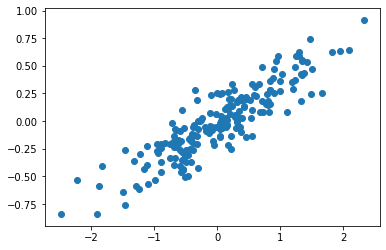

In [63]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


Yukarıdaki örnekte verisetini direkt 2 boyutlu şekilde alıp PCA uyguladık. Şimdi bu datasetini tek boyuta dönüştürüp öznitelik ayrıştırma işlemi yapabiliriz.

In [65]:
pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)
print(x_pca.shape)

(200, 1)


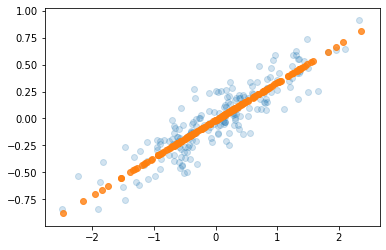

In [66]:
x2 = pca.inverse_transform(x_pca)
plt.scatter(x[:,0], x[:,1], alpha=0.2)
plt.scatter(x2[:,0], x2[:,1], alpha=0.8)
plt.show()

Değişken gruplarının varyanslarını ifade eden özdeğerler ile verisetindeki değişkenler gruplandırılır. Bu gruplar arasında en yüksek varyansa sahip gruplar en önemli gruplardır

Grafiğe bakıldığında feature extraction uygulanan veri setinin daha düz ve doğrusal bir oran verdiği görülmektedir.

Task-5C: Please provide sufficient explanation for randomized PCA and IsoMap algorithms then work on the example related to eigenfaces (in 05.09) by which you should try at least three different values for each of the iterated power and n_components parameters. Please explain the differences between these two algorithms you observed.

Isomap, izometrik haritalama anlamına gelir. İzomap, alt boyuttaki jeodezik mesafeleri korumaya çalışan, spektral teoriye dayalı doğrusal olmayan bir boyutluluk azaltma yöntemidir. Isomap, bir mahalle ağı oluşturarak başlar. Bundan sonra, tüm nokta çiftleri arasındaki yaklaşık jeodezik mesafeye grafik mesafesini kullanır. Ve sonra, jeodezik mesafe matrisinin özdeğer ayrışımı yoluyla, veri setinin düşük boyutlu gömülmesini bulur. Doğrusal olmayan manifoldlarda, mesafe için Öklid metriği, ancak ve ancak komşu yapı doğrusal olarak yaklaştırılabilirse iyidir. Mahallede delikler varsa, Öklid mesafeleri son derece yanıltıcı olabilir. Bunun aksine, manifoldu takip ederek iki nokta arasındaki mesafeyi ölçersek, iki noktanın ne kadar uzak veya yakın olduğuna dair daha iyi bir tahmin elde ederiz.

Standar PCA kullanımı high dimensional datalarda çok daha zordur. Bu gibi durumlarda component sayısını daha hızlı bulmamızı sağlayan Randomized PCA kullanılır. 
It can be considered as a heuristic method.

Isomap tekniği manifold learning kapsamından kullanılan tekniklerden biridir. PCA featurelar arasındaki linear ilişkileri yansıtma konusunda başarılı ama nonlinear ilişkiler konusunda zayıf kalmaktadır.

Isomap de nonlinear ilişikiye sahip feature ları içeren verisetinde kullanılan bir tekniktir. Isomap izometrik haritalama anlamına gelir. Doğrusal olmayan bir boyutluluk azaltma yöntemidir. 

In [51]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [52]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=150, svd_solver='randomized', iterated_power=3)
pca_model

PCA(iterated_power=3, n_components=150, svd_solver='randomized')

In [53]:
pca_model.fit(faces.data)

PCA(iterated_power=3, n_components=150, svd_solver='randomized')

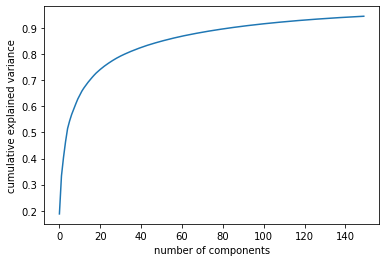

In [55]:
import numpy as np
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

150 component ile kurulan pca modeli yüzde 90 nın üzerinde varyansı ile verisetini açıklayabilmektedir.

Herhangi bir component sayısı vermeden direkt modeli çalıştırıp en iyi verisetini çaıklayabildiğimiz component sayısını bulmak için aşağıdaki grafiğe bakabiliriz.

grafik bize 100 component ve sonrasında yüzde 90 dan fazla bir varyans oranı ie verisetini açıklayabildiğimizi göstermektedir

In [59]:
pca_model1 = PCA(svd_solver='randomized')
pca_model1

PCA(svd_solver='randomized')

In [60]:
pca_model1.fit(faces.data)

PCA(svd_solver='randomized')

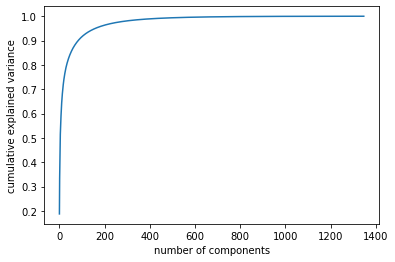

In [61]:
plt.plot(np.cumsum(pca_model1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [62]:
from sklearn.decomposition import PCA
pca_model2 = PCA(n_components=100, svd_solver='randomized', iterated_power=3)
pca_model2

PCA(iterated_power=3, n_components=100, svd_solver='randomized')

In [63]:
pca_model2.fit(faces.data)

PCA(iterated_power=3, n_components=100, svd_solver='randomized')

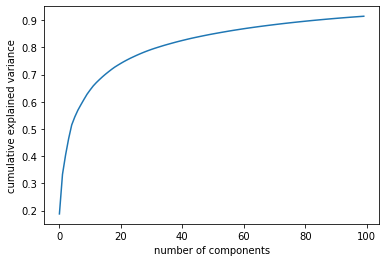

In [64]:
plt.plot(np.cumsum(pca_model2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Bu veriler için, varyansın% 90'ını korumak için yaklaşık 100 bileşene ihtiyaç duyulduğunu görüyoruz: bu bize verinin özünde çok yüksek boyutlu olduğunu söylüyor - sadece birkaç bileşenle doğrusal olarak tanımlanamaz.

Daha önce gösterilen aynı kalıbı kullanarak bu yüzler üzerine yerleştirmeyi bir İzomap hesaplayabiliriz:

IsoMap

In [142]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [143]:
from sklearn.manifold import Isomap
model = Isomap(n_components=100)
proj = model.fit_transform(faces.data)
proj.shape

(1348, 100)

5D ile birleştirip devam ettir. burda isomap ile nasıl devam edeceğimi anlamadım. Hocaya sor.

Task-5D: Please go over the previous example with Isomap parallel to randomized PCA and then run it with Random Frest algorithm via grid search to observe and discuss the differences between these two-dimensionality reduction methods.

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(proj, faces.target, test_size=0.20, random_state=42)

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier() 

In [146]:
from sklearn.model_selection import GridSearchCV
param_grid = {
              'max_depth': [2, 3, 5, 8, 10], 
              'max_features': [30, 40,50,80,100],
              'min_samples_split': [3, 5, 7, 10]
             }
grid = GridSearchCV(rf_model, param_grid, cv=3, refit=True, verbose=2)

In [147]:
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_depth=2, max_features=30, min_samples_split=3 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=2, max_features=30, min_samples_split=3, total=   0.3s
[CV] max_depth=2, max_features=30, min_samples_split=3 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=2, max_features=30, min_samples_split=3, total=   0.3s
[CV] max_depth=2, max_features=30, min_samples_split=3 ...............
[CV]  max_depth=2, max_features=30, min_samples_split=3, total=   0.3s
[CV] max_depth=2, max_features=30, min_samples_split=5 ...............
[CV]  max_depth=2, max_features=30, min_samples_split=5, total=   0.3s
[CV] max_depth=2, max_features=30, min_samples_split=5 ...............
[CV]  max_depth=2, max_features=30, min_samples_split=5, total=   0.3s
[CV] max_depth=2, max_features=30, min_samples_split=5 ...............
[CV]  max_depth=2, max_features=30, min_samples_split=5, total=   0.3s
[CV] max_depth=2, max_features=30, min_samples_split=7 ...............
[CV]  max_depth=2, max_features=30, min_samples_split=7, total=   0.3s
[CV] max_depth=2, max_features=30, min_samples_split=7 ...............
[CV]  max_depth=2, max_features=30, min_samples_split=7, total=   0.3s
[CV] max_depth=2, max_features=30, min_samples_split=7 ...............
[CV]  

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.2min finished


{'max_depth': 10, 'max_features': 50, 'min_samples_split': 7}


In [148]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 50, 
                                  min_samples_split = 7)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=50, min_samples_split=7)

In [149]:
y_pred = rf_tuned.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("{} {:0.2f}%".format("Accuracy Score : ", score*100))

Accuracy Score :  45.56%
